 El alfabeto de las terminales esta conformado por las palabras en minuscula y el de las no terminales por las sigientes abreviaciones en mayuscula:

1. O: Oracion
1. SJ: Sujeto
1. V: Verbo
1. CD: Complemento directo
1. CI: Complemento indirecto
1. CC: Complemento circunstancial
1. SU: Sujeto
1. A: Articulo
1. AD: Adjetivo
1. PP: Preposicion
1. AV: Adverbio
1. V: Verbo

---
- O →  SJ V CD CC| SJ V CD| SJ V CI CC
- SJ → SU | Alexis | Carlos | Pepito | Ignacio
- CD → PP A SU | PP A SU PP A SU | PP A SU PP SU AD
- CI → PP A SU | PP A SU AD| PP SU PP SU
- CC → PP A SU | PP A SU AD|AV| PP A SU PP A SU
- SU → casa | conejo | cama | esfero | computador | Alexis | Libro | Carlos | Pepito | Ignacio
- A → la | el | lo | las | los | un | uno | una | unas | unos | ε
- AD → grande | fuerte | triste | insomne | alegre | inmutable | ε
- PP → a | con | contra | de | desde | en | entre | hacia | sin | sobre | ε
- AV → bastante | lento | poco | frecuentemente | ayer | muy | ε
- V → caminar | camino | camina | caminaron | caminan | camine | caminaron

Está gramática es ambiegua ya que:



> Pepito camina con Juan desde la casa



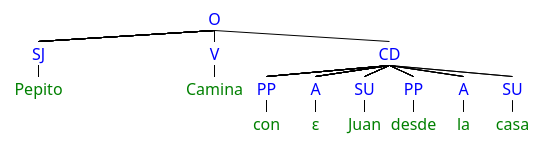

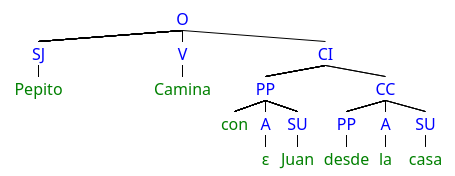

> De esto se deduced que es una grámatica ambigua, por lo tanto no es LL(1) ni LR(1).